### Hyper Parameter Tuning

One of the primary objective and challenge in machine learning process is improving the performance score, based on data patterns and observed evidence. To achieve this objective, almost all machine learning algorithms have specific set of parameters that needs to estimate from dataset which will maximize the performance score. The best way to choose good hyperparameters is through trial and error of all possible combination of parameter values. Scikit-learn provide GridSearch and RandomSearch functions to facilitate automatic and reproducible approach for hyperparameter tuning. 

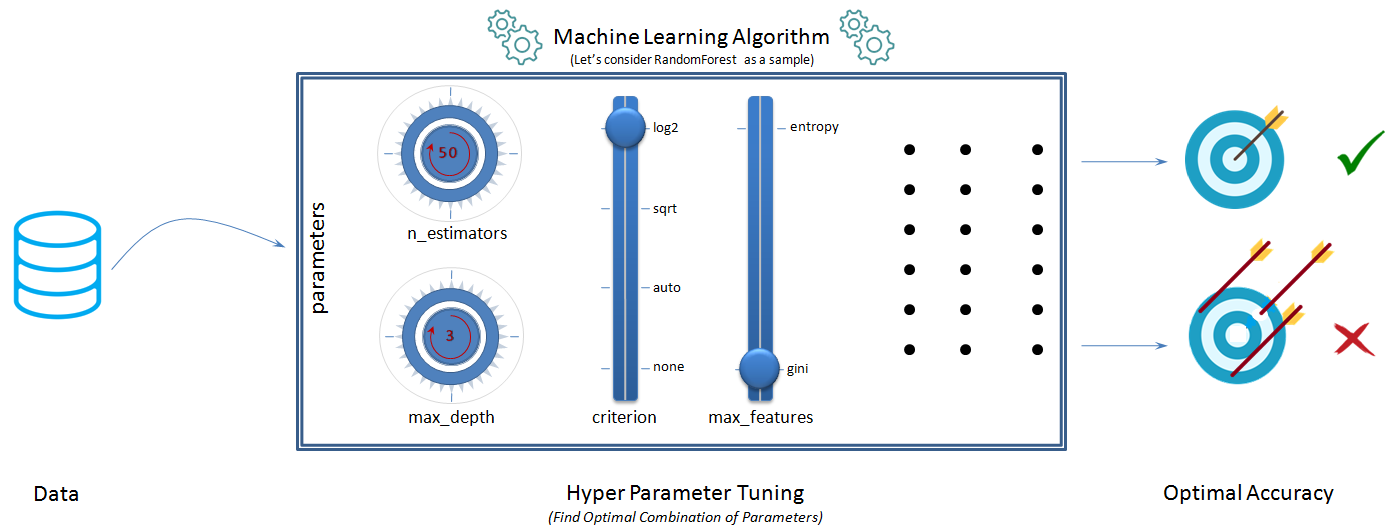

In [22]:
from IPython.display import Image
Image(filename='../Chapter 4 Figures/Hyper_Parameter_Tuning.png', width=1000)

### GridSearch

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
seed = 2017

# read the data in
df = pd.read_csv("Data/Diabetes.csv")

X = df.ix[:,:8].values     # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=5, random_state=seed)
num_trees = 100

clf_rf = RandomForestClassifier(random_state=seed).fit(X_train, y_train)

rf_params = {
    'n_estimators': [100, 250, 500, 750, 1000],
    'criterion':  ['gini', 'entropy'],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_depth': [1, 3, 5, 7, 9]
}

# setting verbose = 10 will print the progress for every 10 task completion
grid = GridSearchCV(clf_rf, rf_params, scoring='roc_auc', cv=kfold, verbose=10, n_jobs=-1)
grid.fit(X_train, y_train)

print 'Best Parameters: ', grid.best_params_

results = cross_validation.cross_val_score(grid.best_estimator_, X_train,y_train, cv=kfold)
print "Accuracy - Train CV: ", results.mean()
print "Accuracy - Train : ", metrics.accuracy_score(grid.best_estimator_.predict(X_train), y_train)
print "Accuracy - Test : ", metrics.accuracy_score(grid.best_estimator_.predict(X_test), y_test)

C:\Users\Manoh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Manoh\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Paralle

Best Parameters:  {'max_features': 'log2', 'n_estimators': 500, 'criterion': 'entropy', 'max_depth': 5}
Accuracy - Train CV:  0.744790584978
Accuracy - Train :  0.862197392924
Accuracy - Test :  0.796536796537


### RandomSearch

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# specify parameters and distributions to sample from
param_dist = {'n_estimators':sp_randint(100,1000),
              'criterion': ['gini', 'entropy'],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
              'max_depth': [None, 1, 3, 5, 7, 9]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist, cv=kfold, 
                                   n_iter=n_iter_search, verbose=10, n_jobs=-1, random_state=seed)

random_search.fit(X_train, y_train)
# report(random_search.cv_results_)

print 'Best Parameters: ', random_search.best_params_

results = cross_validation.cross_val_score(random_search.best_estimator_, X_train,y_train, cv=kfold)
print "Accuracy - Train CV: ", results.mean()
print "Accuracy - Train : ", metrics.accuracy_score(random_search.best_estimator_.predict(X_train), y_train)
print "Accuracy - Test : ", metrics.accuracy_score(random_search.best_estimator_.predict(X_test), y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


Best Parameters:  {'max_features': None, 'n_estimators': 694, 'criterion': 'entropy', 'max_depth': 3}
Accuracy - Train CV:  0.75424022153
Accuracy - Train :  0.780260707635
Accuracy - Test :  0.805194805195


In [21]:
from bayes_opt import BayesianOptimization
from sklearn.cross_validation import cross_val_score

def rfccv(n_estimators, min_samples_split, max_features):
    return cross_val_score(RandomForestClassifier(n_estimators=int(n_estimators),
                                                  min_samples_split=int(min_samples_split),
                                                  max_features=min(max_features, 0.999),
                                                  random_state=2017),
                                                  X_train, y_train, 'f1', cv=kfold).mean()

gp_params = {"alpha": 1e5}

rfcBO = BayesianOptimization(rfccv, {'n_estimators': (100, 1000),
                                     'min_samples_split': (2, 25),
                                     'max_features': (0.1, 0.999)})

rfcBO.maximize(n_iter=10, **gp_params)

print('RFC: %f' % rfcBO.res['max']['max_val'])

Initialization
-------------------------------------------------------------------------------------
 Step |   Time |      Value |   max_features |   min_samples_split |   n_estimators | 
    1 | 00m13s |    0.59033 |         0.1628 |              2.7911 |       891.4580 | 
    2 | 00m08s |    0.57056 |         0.1725 |              4.1269 |       543.9055 | 
    3 | 00m04s |    0.61064 |         0.7927 |             21.6962 |       275.7203 | 
    4 | 00m06s |    0.58312 |         0.2228 |              6.4325 |       437.6023 | 
    5 | 00m03s |    0.61265 |         0.3626 |             12.2393 |       236.6017 | 
Bayesian Optimization
-------------------------------------------------------------------------------------
 Step |   Time |      Value |   max_features |   min_samples_split |   n_estimators | 
    6 | 00m17s |    0.61354 |         0.6776 |             22.9885 |       999.9903 | 
    7 | 00m01s |    0.60445 |         0.3997 |             22.0831 |       100.0026 | 
    8 | 